# Clipdrop API를 이용한 Stable Diffusion Prompt Engineering

API 코드를 편리하게 사용하기 위해 함수화

In [2]:
import requests
from PIL import Image
from io import BytesIO

def stable_diffusion_gen(prompt:str,
                         numbering:int,
                         extension:str = 'jpg') -> None:
    
    r = requests.post('https://clipdrop-api.co/text-to-image/v1',
        files = {
            'prompt': (None, prompt, 'text/plain')
        },
        headers = {'x-api-key': API_KEY}
    )
    if r.ok:
        img = Image.open(BytesIO(r.content))
    else:
        r.raise_for_status()

    img.save(f'gen_imgs/stable_diffusion_img_{numbering}.{extension}')

## 고급기계학습 과제 1

Generate images for "DATA303".\
Prof. Hyunwoo J Kim tried to generate images with "DATA303" and "Generative Models".\
They are not "fabulous".\
You can be creative and do "prompt engineering".\
Generate awesome images for DATA303 using off-the-shelf generative models.

== Examples ==
* DALLE2
* Stable diffusion
* Midjourney
* Dezgo
* Your favorite generative models/services

== Submission == 
1.  Report (a two-page long "PDF" file) with images/prompt/discussions. 
    - One your best image and prompt
    - At least ten trials (images with prompts)
    - Discussions, e.g., how you found/optimized prompts, comparison between different generative models.
2. Your best image in an image file.

'DATA303'이라는 문구가 들어간 이미지를 만드는데, 글자가 이상하게 깨지지 않고 잘 나오게끔 해보기

### 접근법
- "Investigating Prompt Engineering in Diffusion Models" (Witteveen and Andrews, 2022) 논문에 의하면 아래와 같은 규칙을 따르면 좋은 퀄리티의 이미지를 만들어낼 확률이 높다고 한다.
    - 그릴 대상을 명확한 명사로 나타내라
    - 스타일을 살리는 제일 좋은 방법은 특정 화가의 이름을 추가하는 것이다
    - 배경같은 걸 달리 하고 싶으면 descriptor를 조절하라
        - 대상에 대한 descriptor를 반복해서 넣으면 배경이 없어지는 효과가 있다
        - 조명에 대한 descriptor를 넣으면 descriptor의 의미에 따라 배경이 드라마틱하게 바뀌기도 한다
        - Descriptor는 형용사보다는 명사가 더 효과가 좋다
    - 여러 시드 값을 시도해보고 괜찮은 결과가 나오는 것으로 고정하라: 이건 지금 API로는 불가능
- "Design Guidelines for Prompt Engineering Text-to-Image Generative Models" (Liu and Chilton, 2022) 논문에서는 어떻게 주장하니
    - 접속사(connecting words)보다는 대상과 스타일의 keyword를 명확하게 입력하라
    - 스타일은 광범위해도 좋고 사소해도 좋으니 prompt에 자유롭게 추가해라
    - 스타일이 추상적이면 대상은 이를 상쇄할 만한 구체적인 것으로 입력해라

1번째 시도  
글자가 깨지지 않고 잘 나오게 하기 위한 접근법  
- 주변에 잡다한 대상을 그리지 말고 딱 심플하게 흰 종이에 "DATA303"이라고 적힌 것만 나오게 요청하기
- 배경에 특별한 걸 그리지 않도록 하기 위해 descriptor 추가하지 않기

In [4]:
prompt_trial1 = 'a paper with the word "DATA303" printed on it'
stable_diffusion_gen(prompt_trial1, 1)

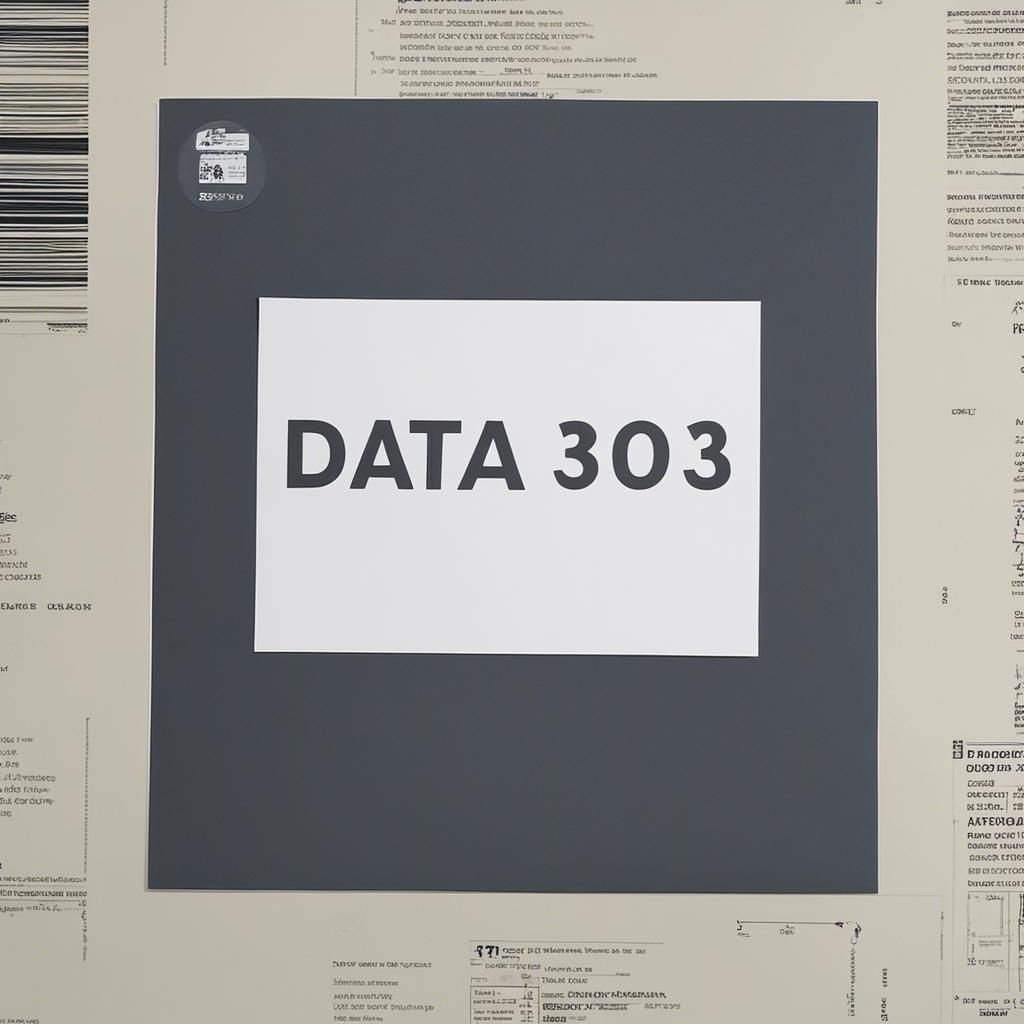

In [3]:
for i in range(101, 106):
    stable_diffusion_gen(prompt_trial1, i)

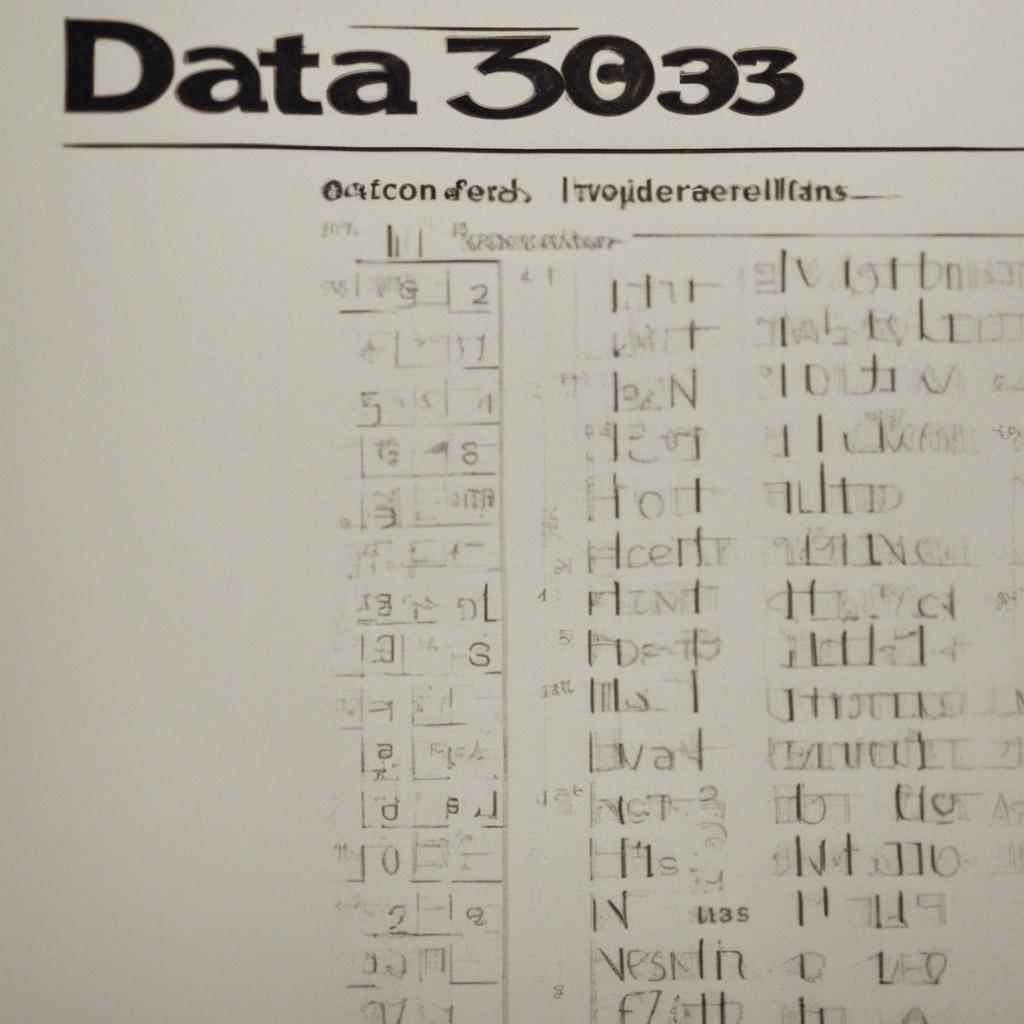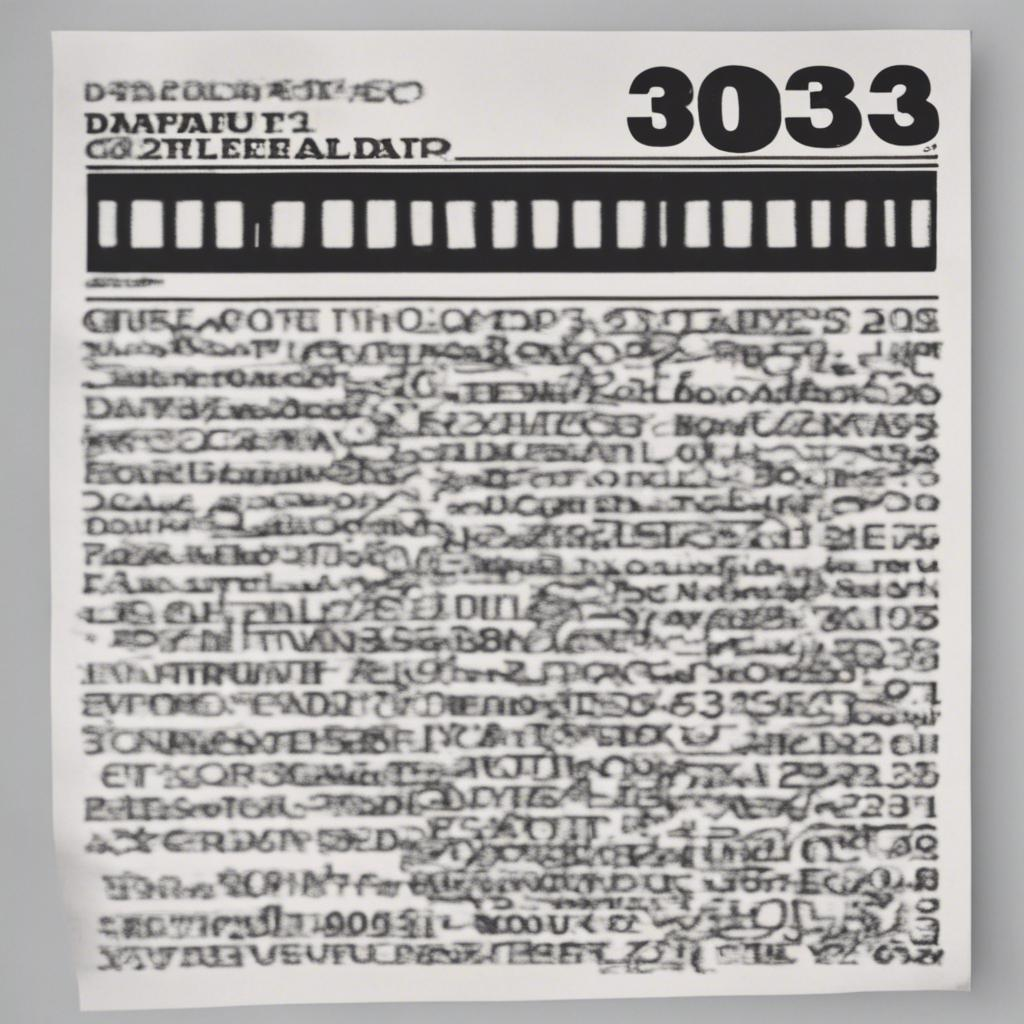 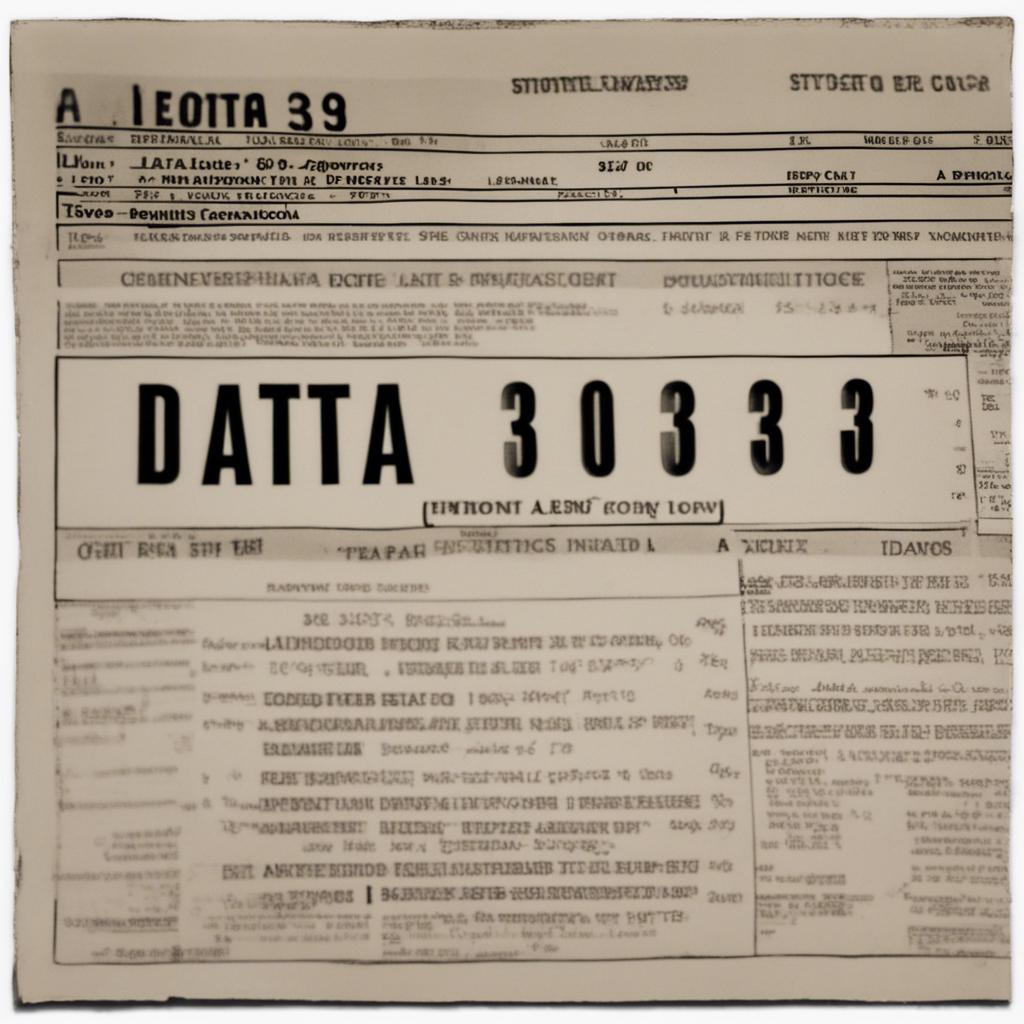 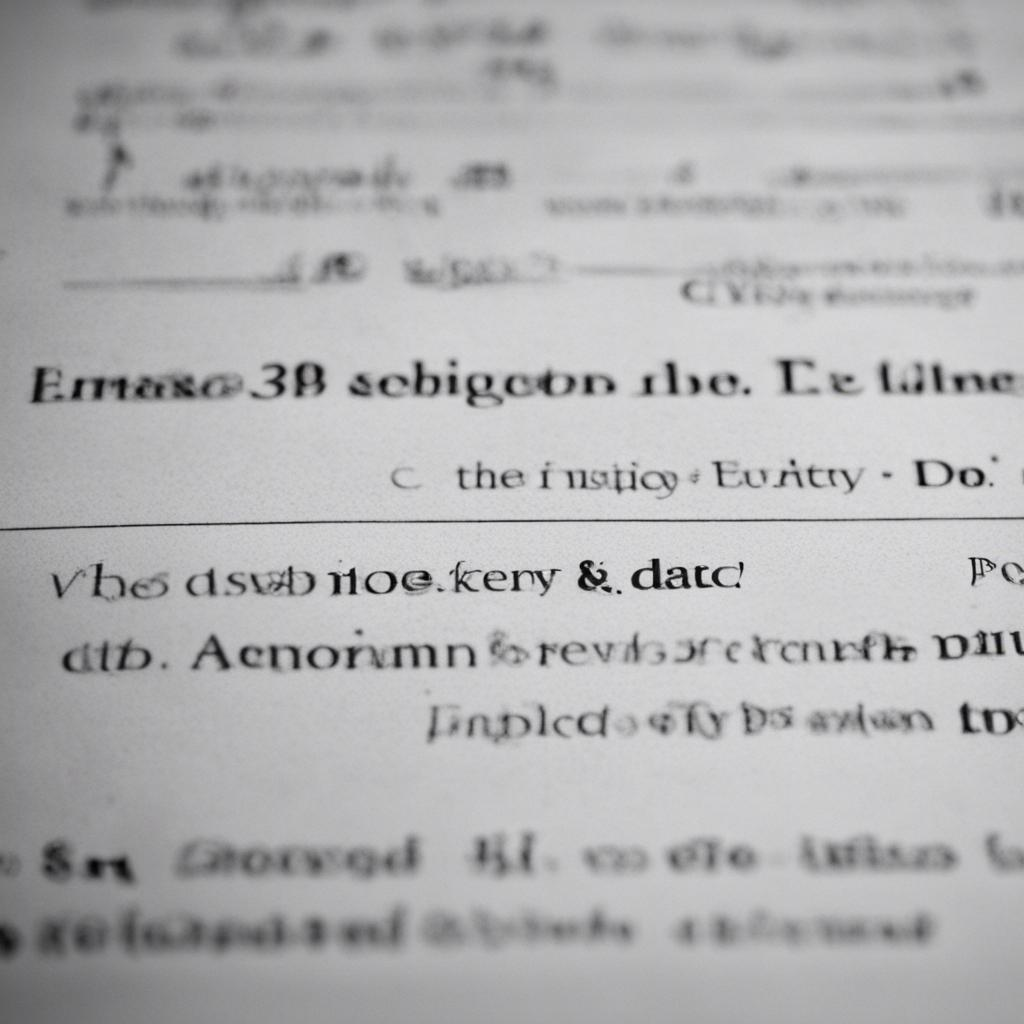 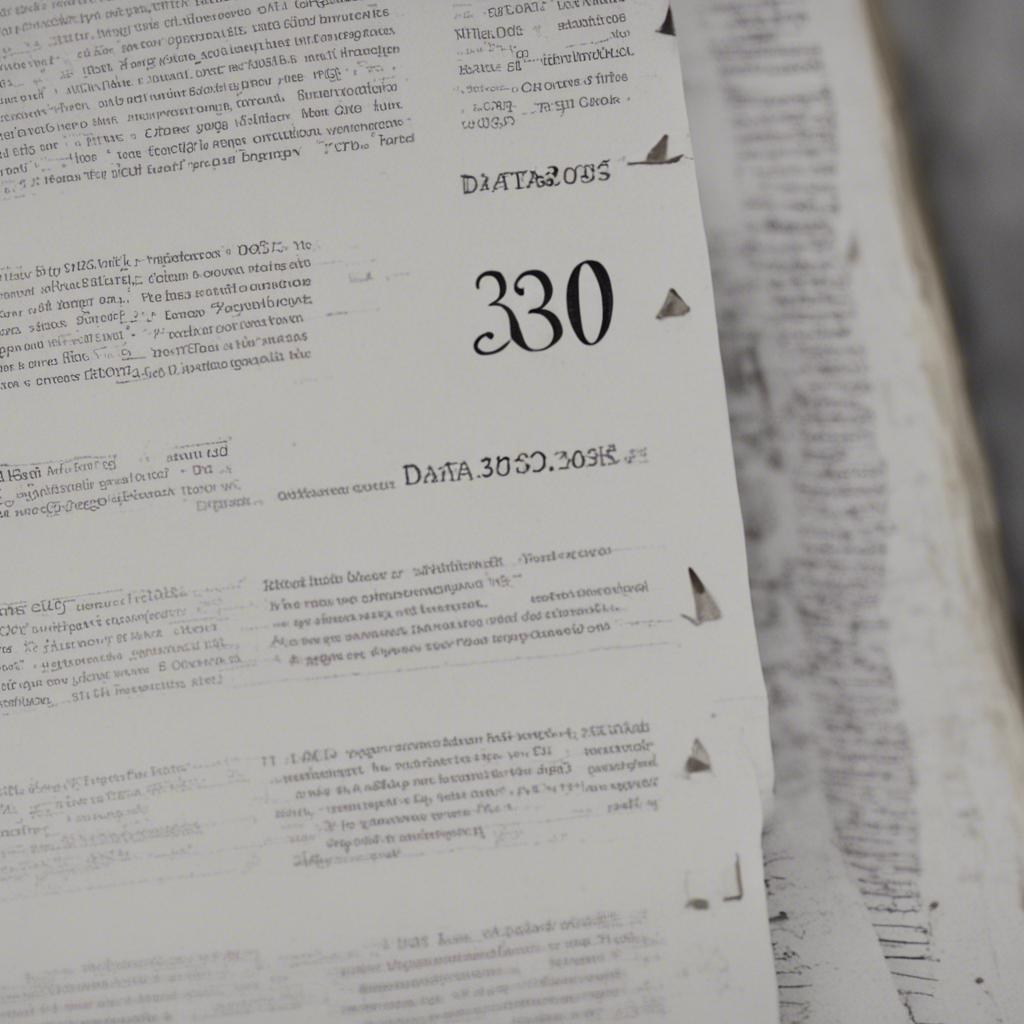

2번째 시도
- 1번째 시도에서 우연히 한 번 최적의 결과가 나오긴 했지만, 여러번 시도해보니 다시 글자가 명확하게 나오지 않았다
- 글씨에 스타일을 추가하기 위한 descriptor 시도
- 글씨는 artist 이름 대신 유명한 글씨체 옵션을 추가해보는 것을 시도 -- 여기서는 Helvetica

In [5]:
prompt_trial2 = 'a paper with the word "DATA303" printed on it, Helvetica font'
stable_diffusion_gen(prompt_trial1, 2)

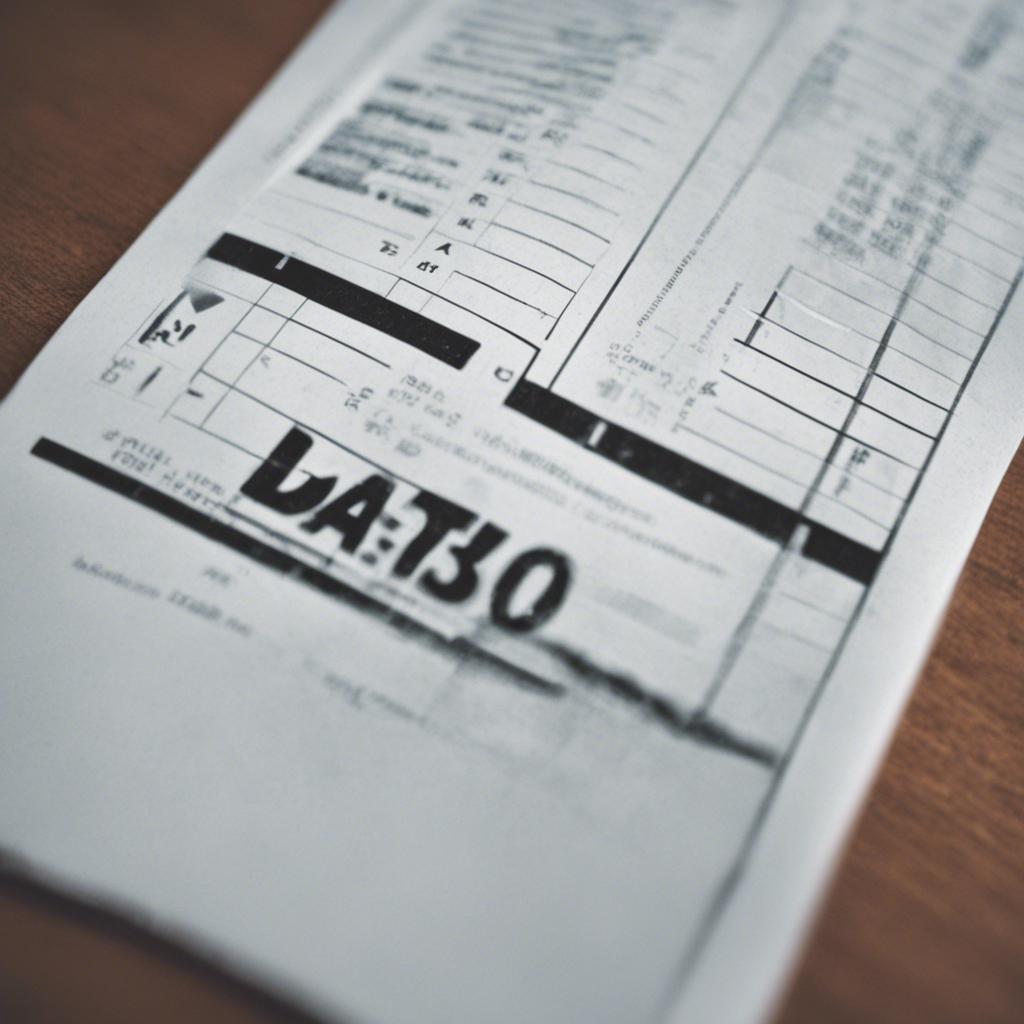

3번째 시도

- 글씨체에 관한 정보를 모델이 잘 인식하지 못하는 것으로 보이니 이 descriptor는 제거
- 1번째 결과에서 배경이 사라지게끔 descriptor를 반복해서 넣어보기  
- descriptor는 딱 문구가 적힌 종이만 있게끔 'paper'를 반복하기  
- Witteveen and Andrews 논문에 의하면 descriptor를 5번정도 쓰면 배경이 사라지는 효과가 생긴다고 하니 5번 반복해보기

In [7]:
prompt_trial3 = 'a paper with the word "DATA303" printed on it, paper, paper, paper, paper, paper'
stable_diffusion_gen(prompt_trial3, 3)

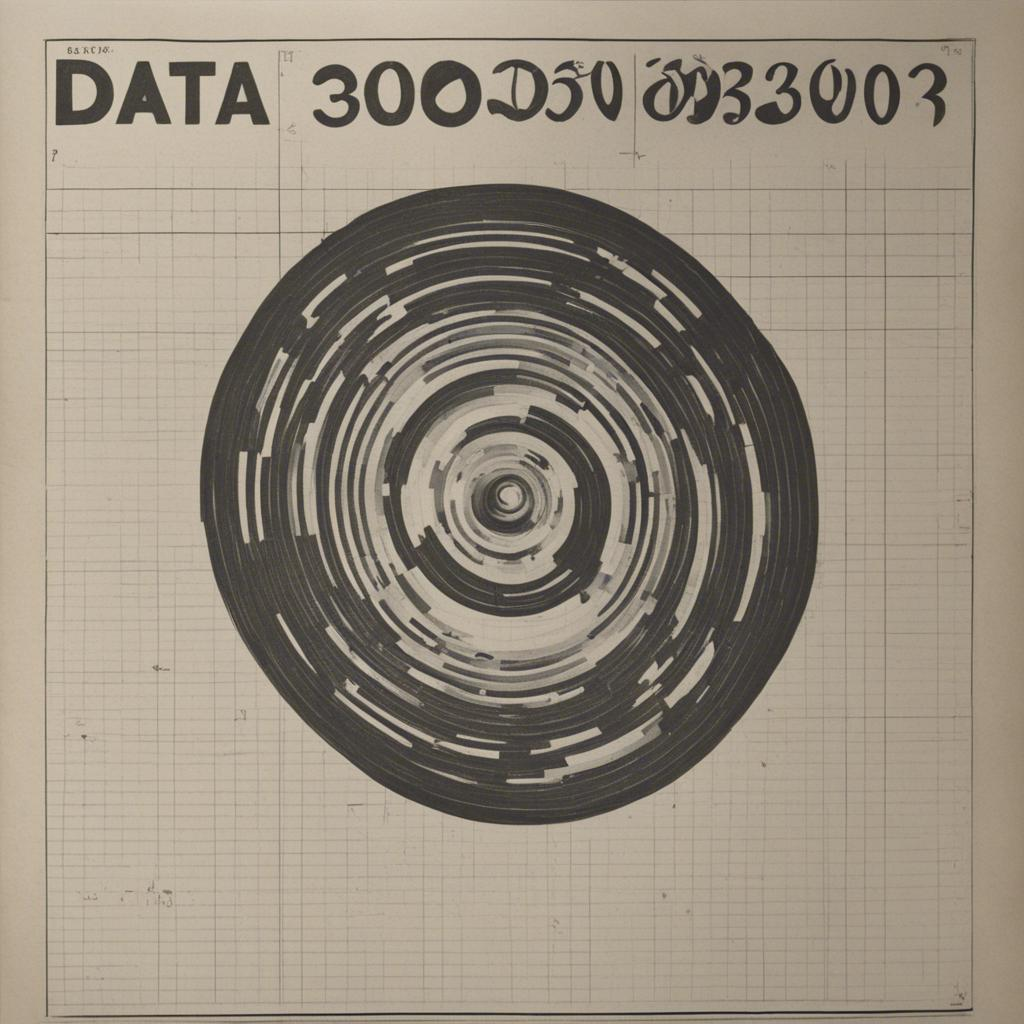

4번째 시도
- 'paper'라는 말이 많이 반복되니 종이 외의 배경을 없애는 데에는 성공했으나, 종이 위에 "DATA303"이란 문구를 써야한다는 명령은 희석된 듯함 
- Main content를 아예 'DATA303'라는 문구로 정함으로써 이 문제를 해결하기 시도

In [8]:
prompt_trial4 = 'the word "DATA303" printed on a paper'
stable_diffusion_gen(prompt_trial4, 4)

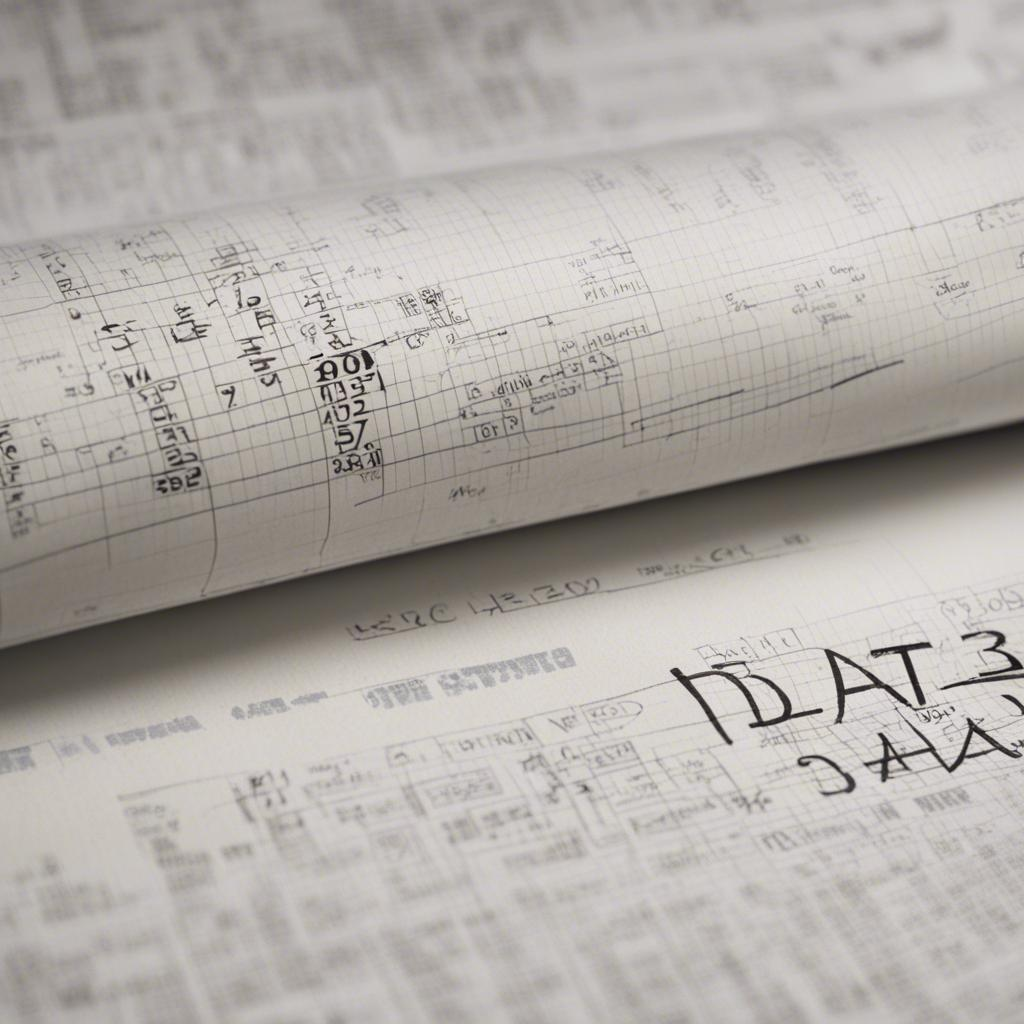

5번째 시도

- 'DATA303'이라는 문구를 재현하는 데에 집중한 것이 아니라 종이를 그럴 듯하게 꾸미는 데에 집중이 되어버림 -- word 'DATA303'이란 말은 명확한 명사가 아니라서 의미를 잘 파악하지 못한 듯함
- 다시 대상은 paper라고 하는 것으로 돌아가자
- paper가 비어 있고 그 위에는 'DATA303'이라는 문구만 있어야 함을 강조해야 할 듯하다.  

In [9]:
prompt_trial5 = 'a plain paper with the word "DATA303" printed on it'
stable_diffusion_gen(prompt_trial5, 5)

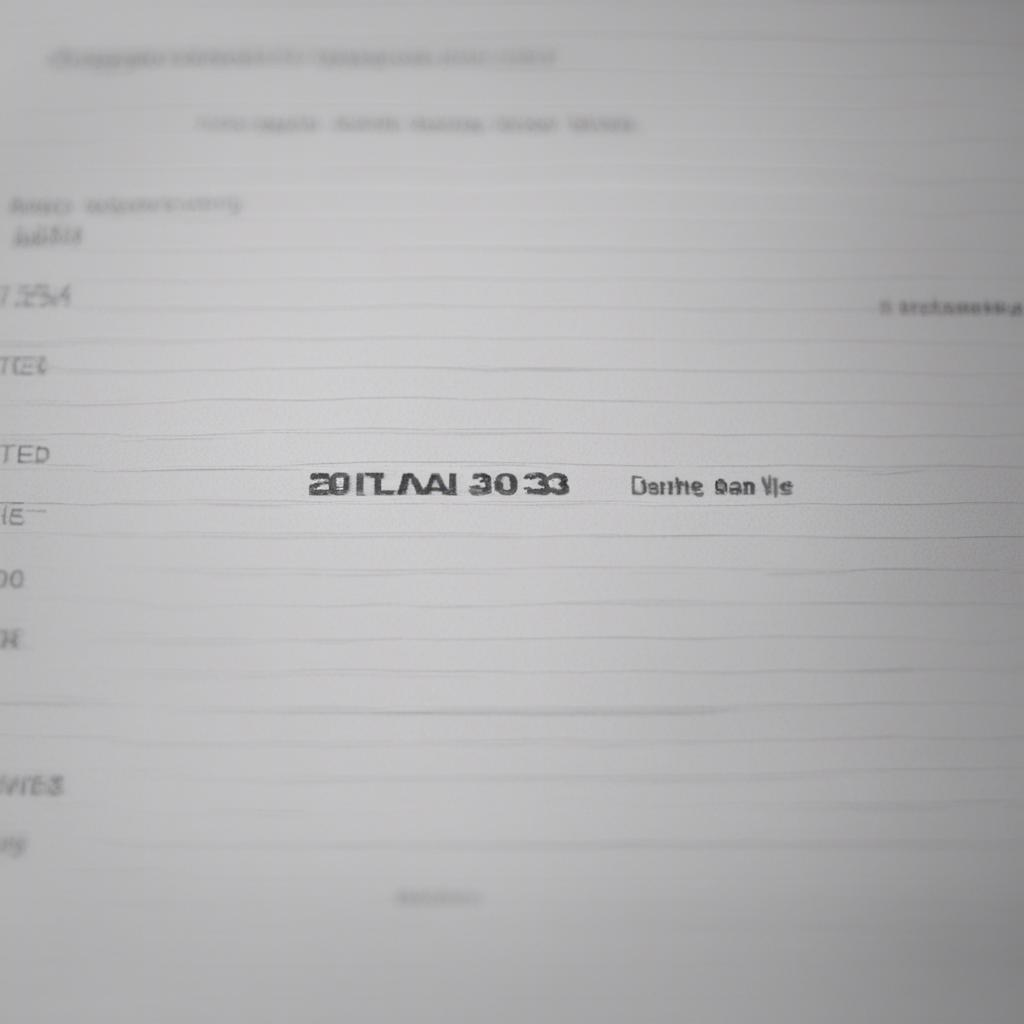

6트

- Prompt를 보다 간결하게 하는 것을 시도하기 
- 형용사를 최소화하고 웬만해선 명사만 입력하기

In [3]:
prompt_trial6 = 'a paper, printed "DATA303"' # printed는 마치 그림의 style인 것처럼 취급되게
stable_diffusion_gen(prompt_trial6, 6)

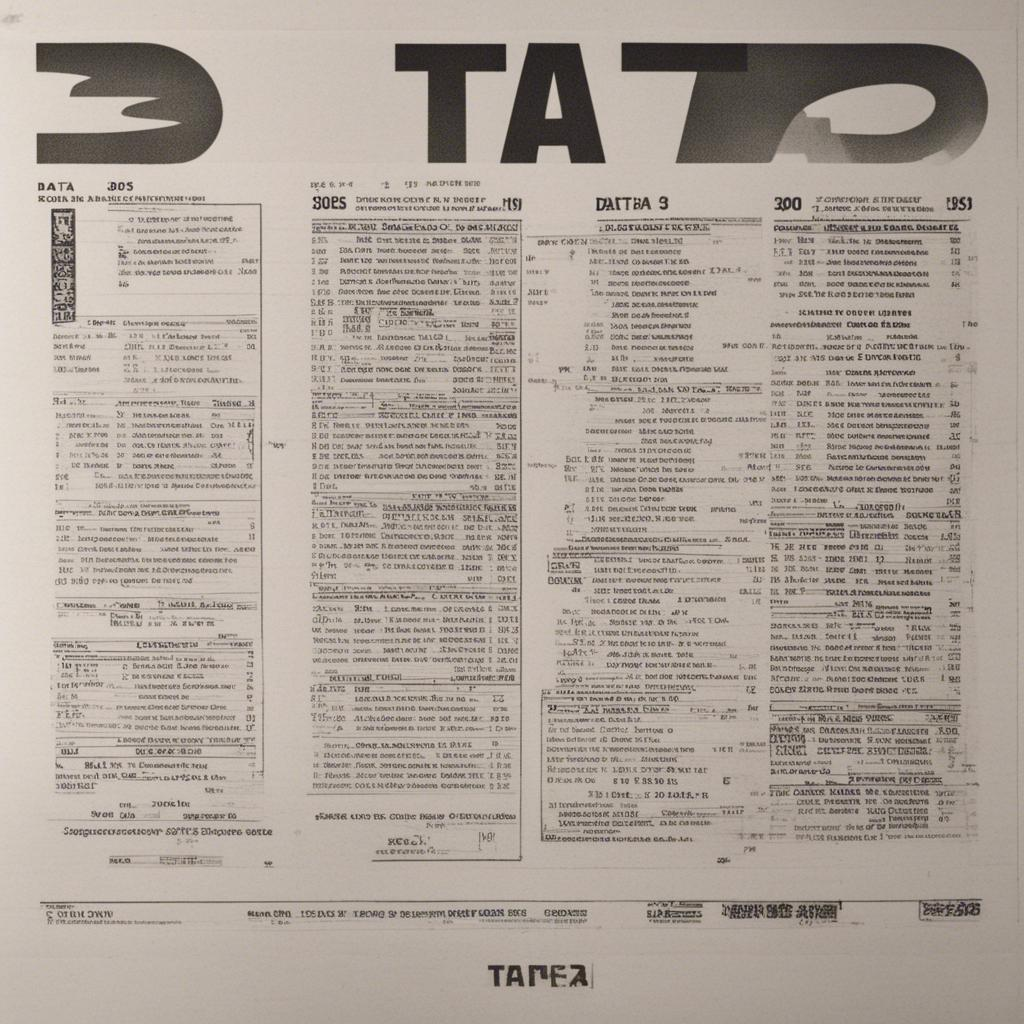

7트

- Paper라는 단어를 newspaper나 research paper 같은 의미로도 받아들이니까 자꾸 'DATA303'뿐만이 아니라 다른 잡다한 것이 쓰인 종이를 그려내는 것 같다.
- 이런 중의성을 해소하기 위해 이번에는 paper 대신 whiteboard 같은 말로 바꿔보자

In [4]:
prompt_trial7 = 'a whiteboard, written word "DATA303"'
stable_diffusion_gen(prompt_trial7, 7)

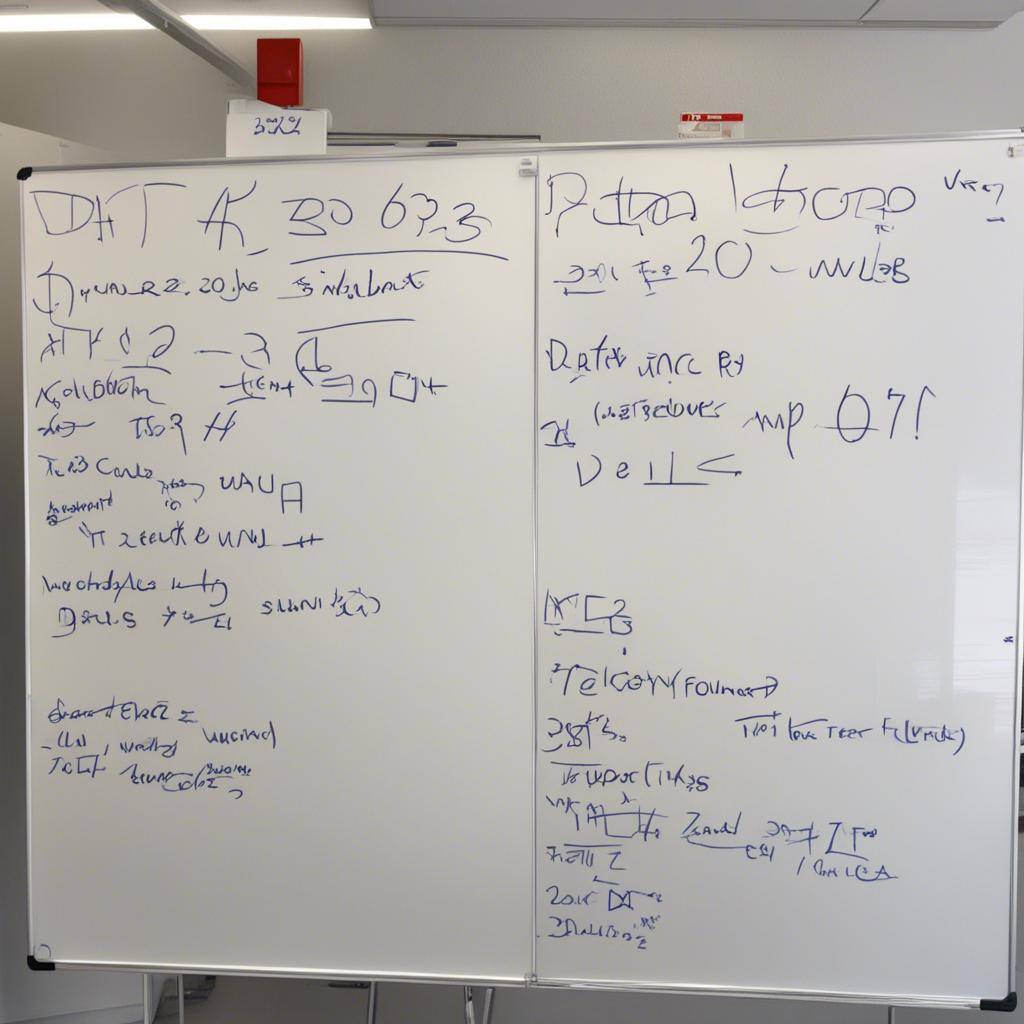

8트

- Whiteboard에도 잡다한 것들을 많이 써놓는다
- 단어 하나 정도만 들어가는 대상을 그려달라고 하면 'DATA303' 이외의 다른 것들을 안 적을 것으로 예상 -- 예를 들면 name tag

In [5]:
prompt_trial8 = 'a name tag of "DATA303"'
stable_diffusion_gen(prompt_trial8, 8)

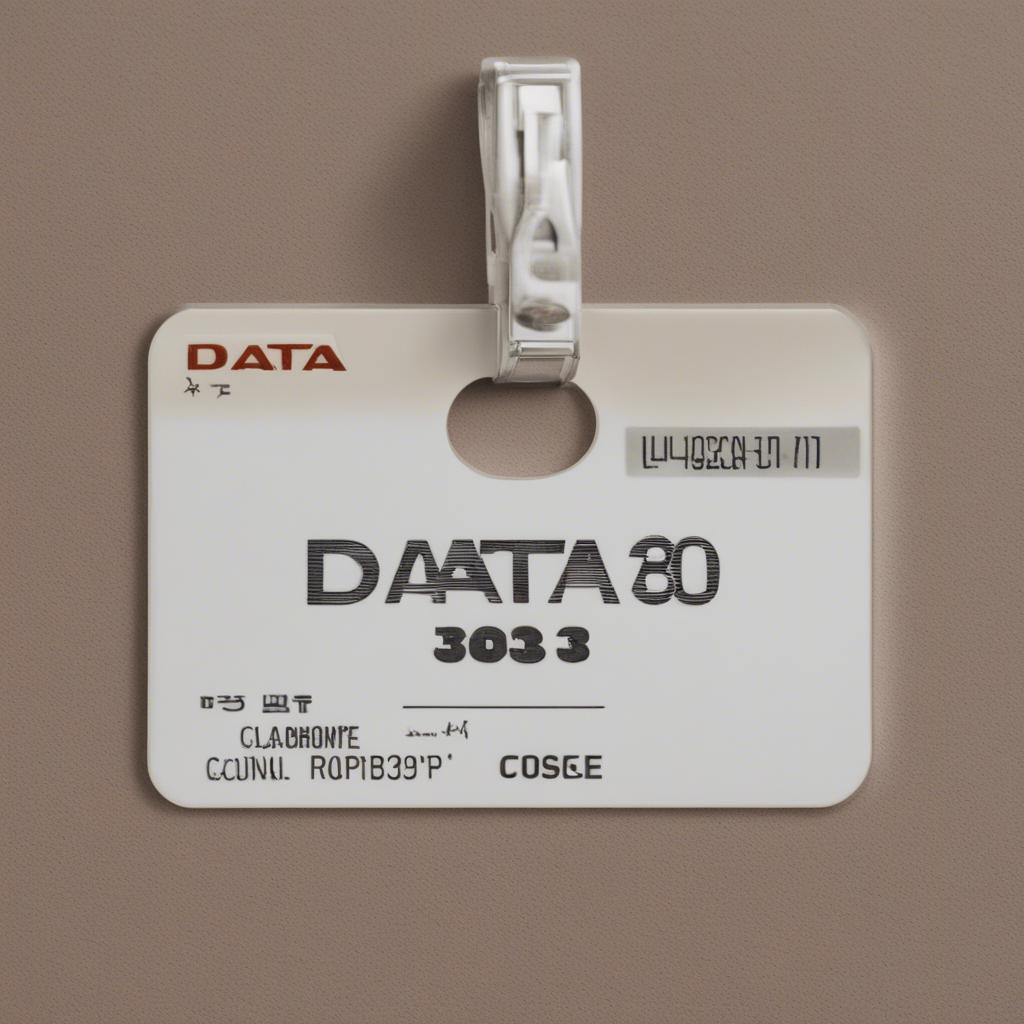

9트

- Name tag 마저도 뭔가 부수적인 것들이 쓰여있을 뿐더러, 'DATA303'이라는 문구가 잘 나오지 않음
- 연결된 문자열을 그림으로 그려달라고 해서 오류가 나는 것일 수도 있다고 예상 
- 글자 하나하나를 그려달라는 요청은 조금 더 잘 해낼 것을 기대

In [9]:
prompt_trial9 = 'alphabet blocks organized as "D", "A", "T", "A", "3", "0", "3"'
stable_diffusion_gen(prompt_trial9, 9)

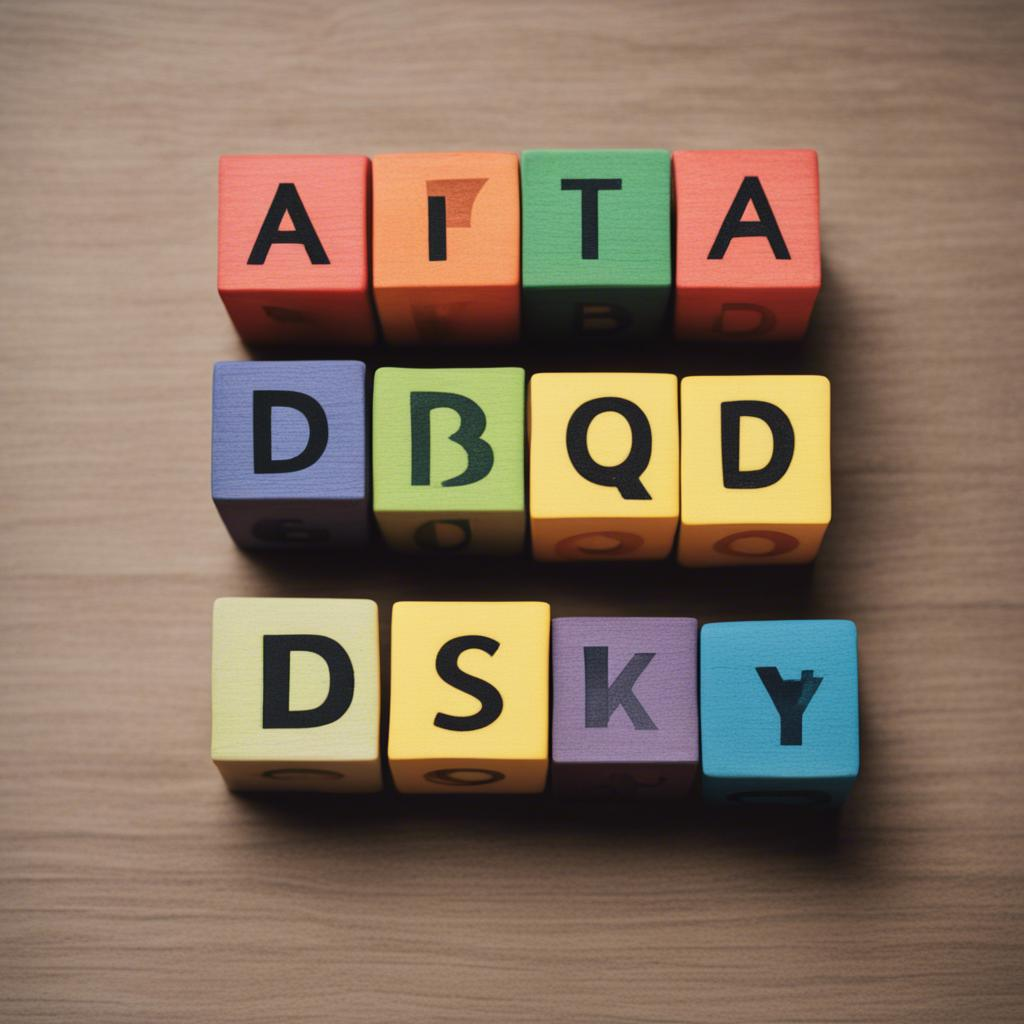

10트

- 알파벳 블럭을 그려달라고 해놓고 숫자를 넣은 것이 문제일 수 있음
- 알파벳 블럭이라고 특정짓지 말고 그냥 블럭이라고 해보자
- 그리고 딱 7글자에 맞는 블럭만 그리지 않았으므로 블럭이 7개라고도 특정지어보기

In [11]:
prompt_trial10 = 'seven blocks with each block written and ordered as "D", "A", "T", "A", "3", "0", "3"'
stable_diffusion_gen(prompt_trial10, 10)

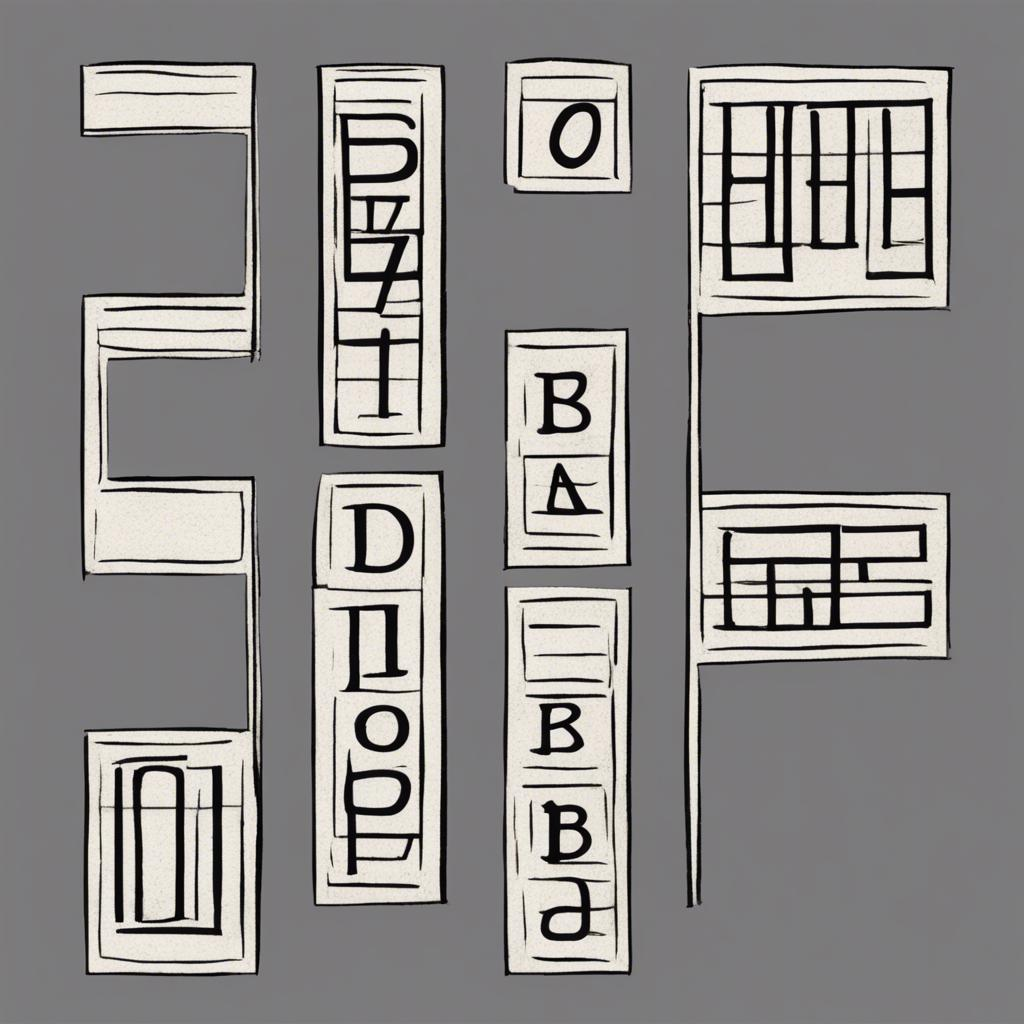

11트

- 쓰다 보니 통상의 prompt와 너무 거리가 멀게 text를 입력하여 모델이 의미 파악을 잘 못하는 것으로 예상
- 다시 prompt를 간단하게 하는 방향으로 시도하기

In [13]:
prompt_trial11 = 'a paper with the word only "DATA303" printed on it'
stable_diffusion_gen(prompt_trial11, 11)

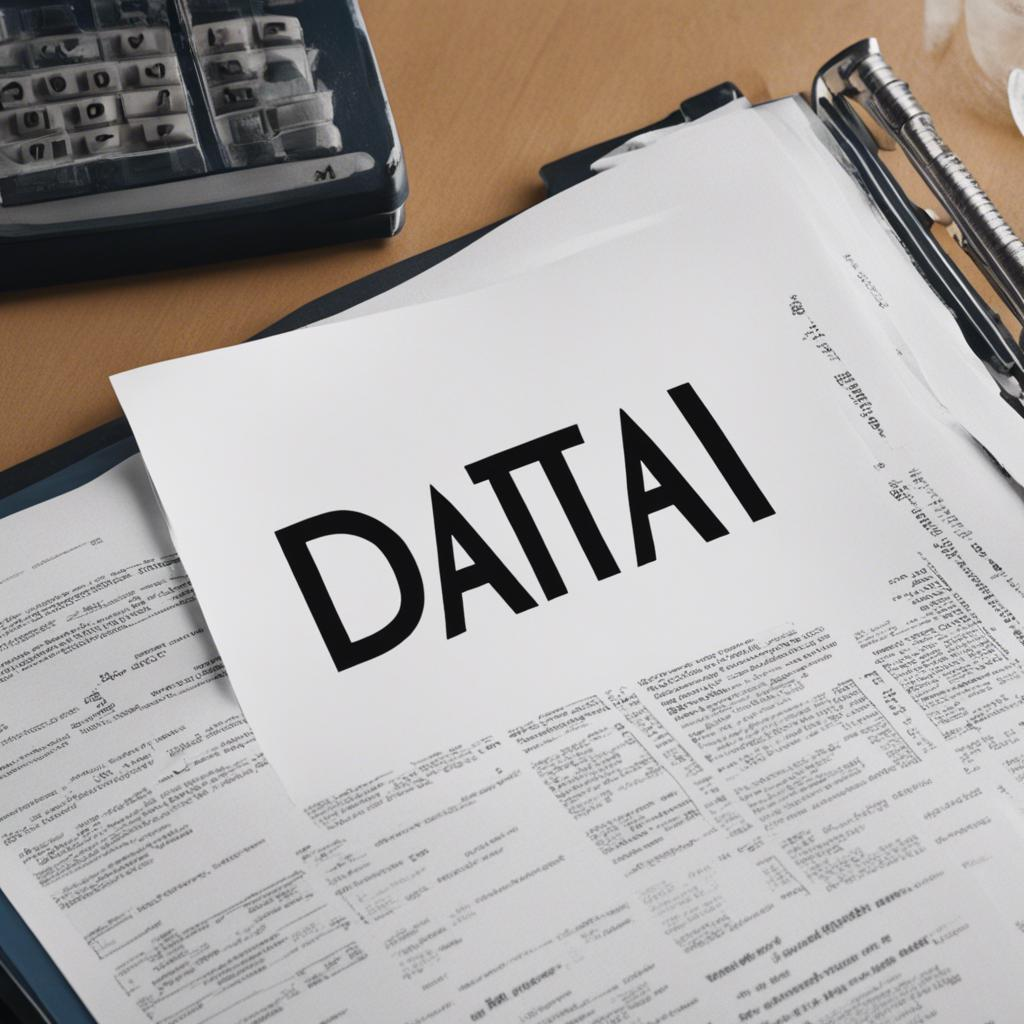

12트

- 종이나 판에 글씨 쓰는 것 대신 조금 다르게 접근해보자

In [16]:
prompt_trial12 = 'a sculpture of the word "DATA303"'
stable_diffusion_gen(prompt_trial12, 12)

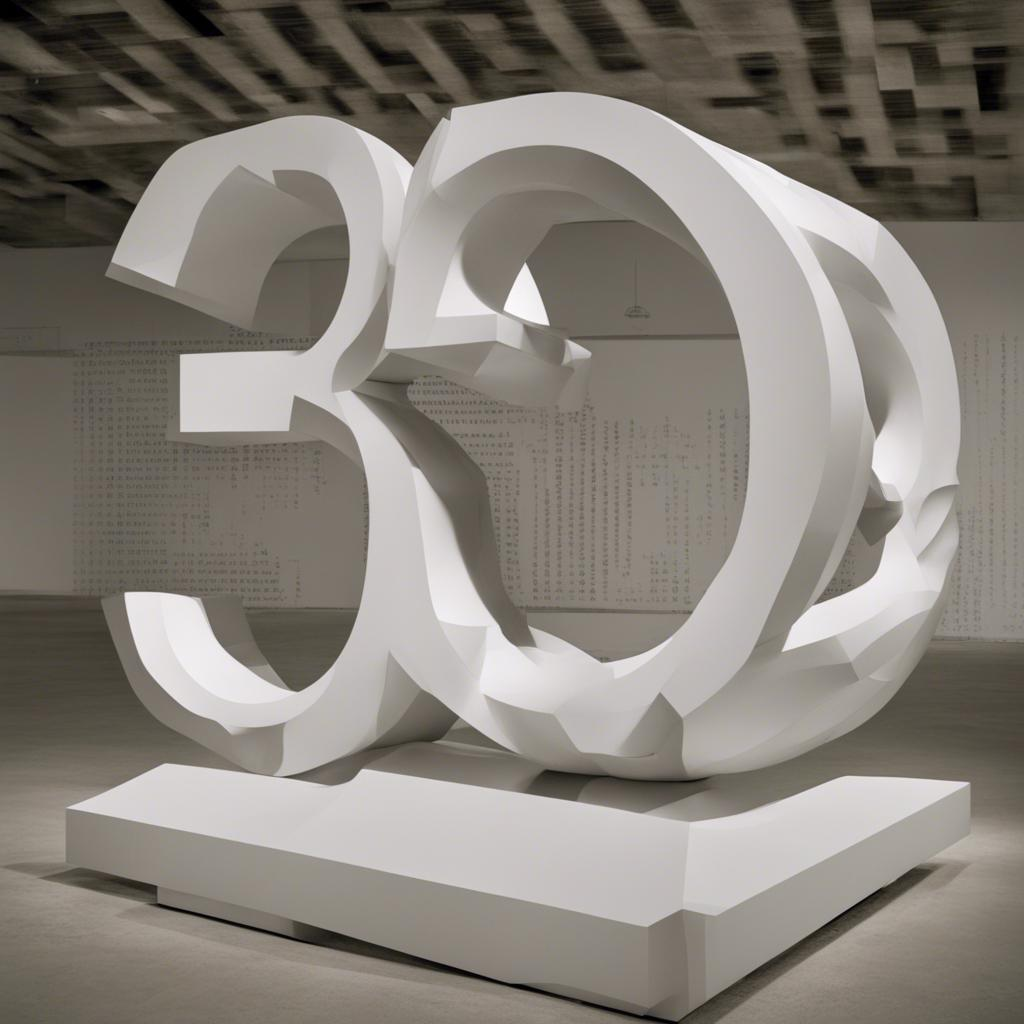

13트

- 글자를 하나씩 따로 띄워놓으면 각 글자를 문자 그대로의 모양으로 인식할 것으로 예상

In [21]:
prompt_trial13 = 'a paper written as D A T A 3 0 3'
stable_diffusion_gen(prompt_trial13, 13)

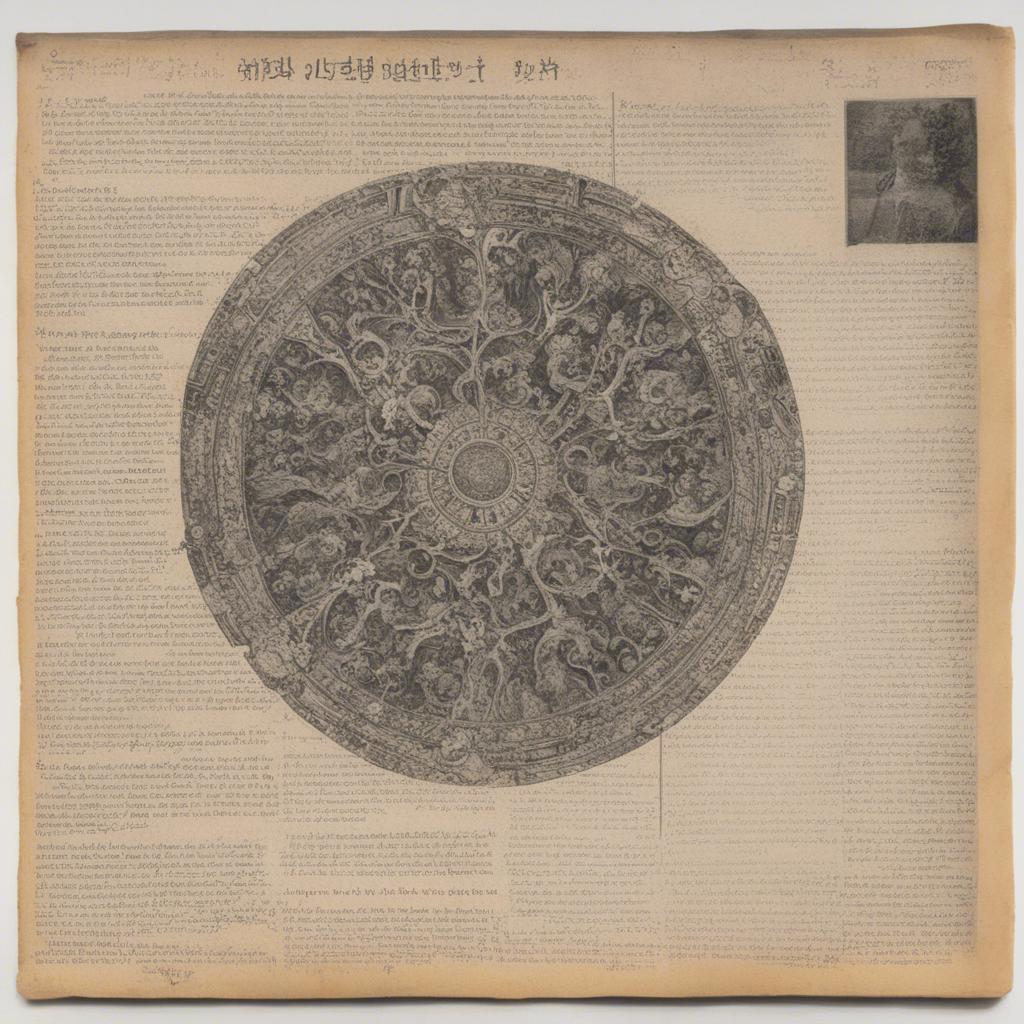

14트

- 따옴표에 글자를 넣어서 써야 할 대상을 명시하기

In [22]:
prompt_trial14 = 'a paper written as "D A T A 3 0 3"'
stable_diffusion_gen(prompt_trial14, 14)

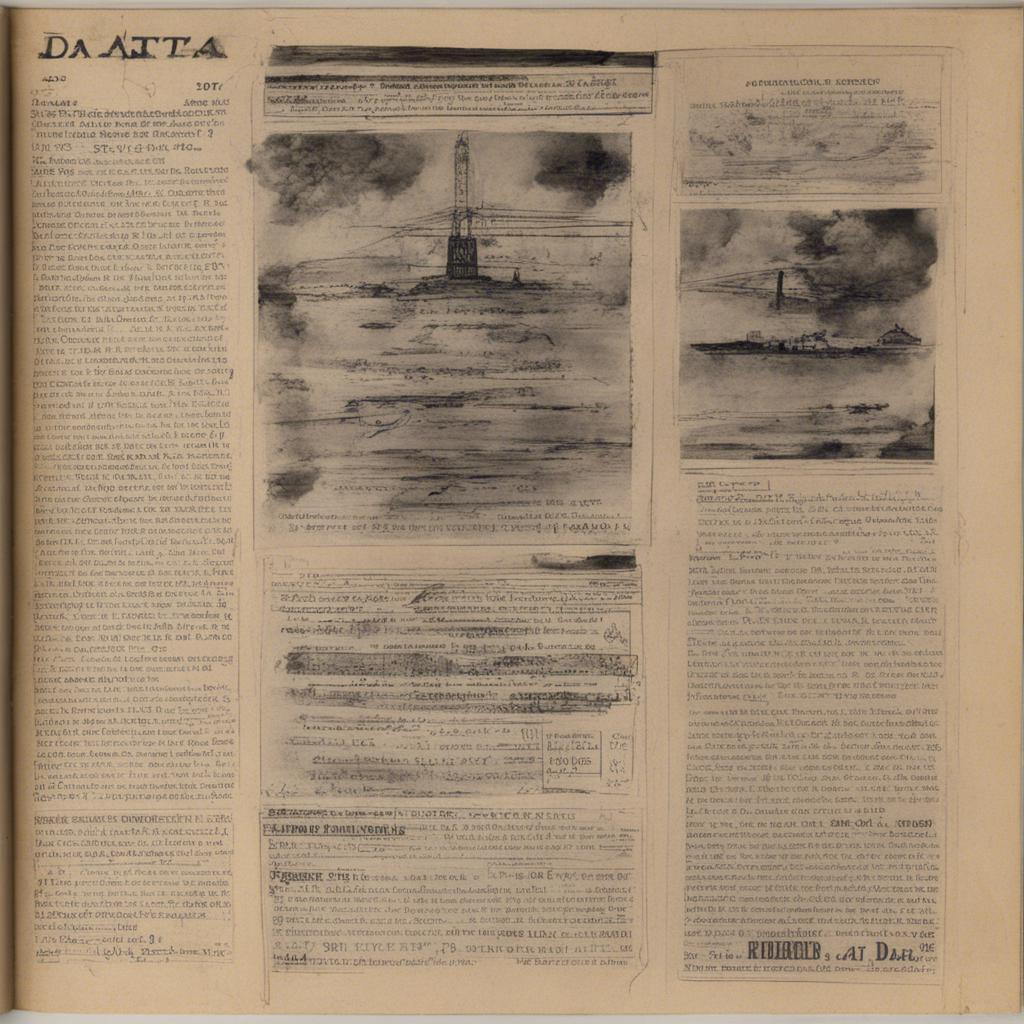

15트

- 1번째 시도에서 썼던 prompt 형식에 맞춰 시도해보기

In [24]:
prompt_trial15 = 'a paper with letters "D A T A 3 0 3" printed on it'
stable_diffusion_gen(prompt_trial15, 15)

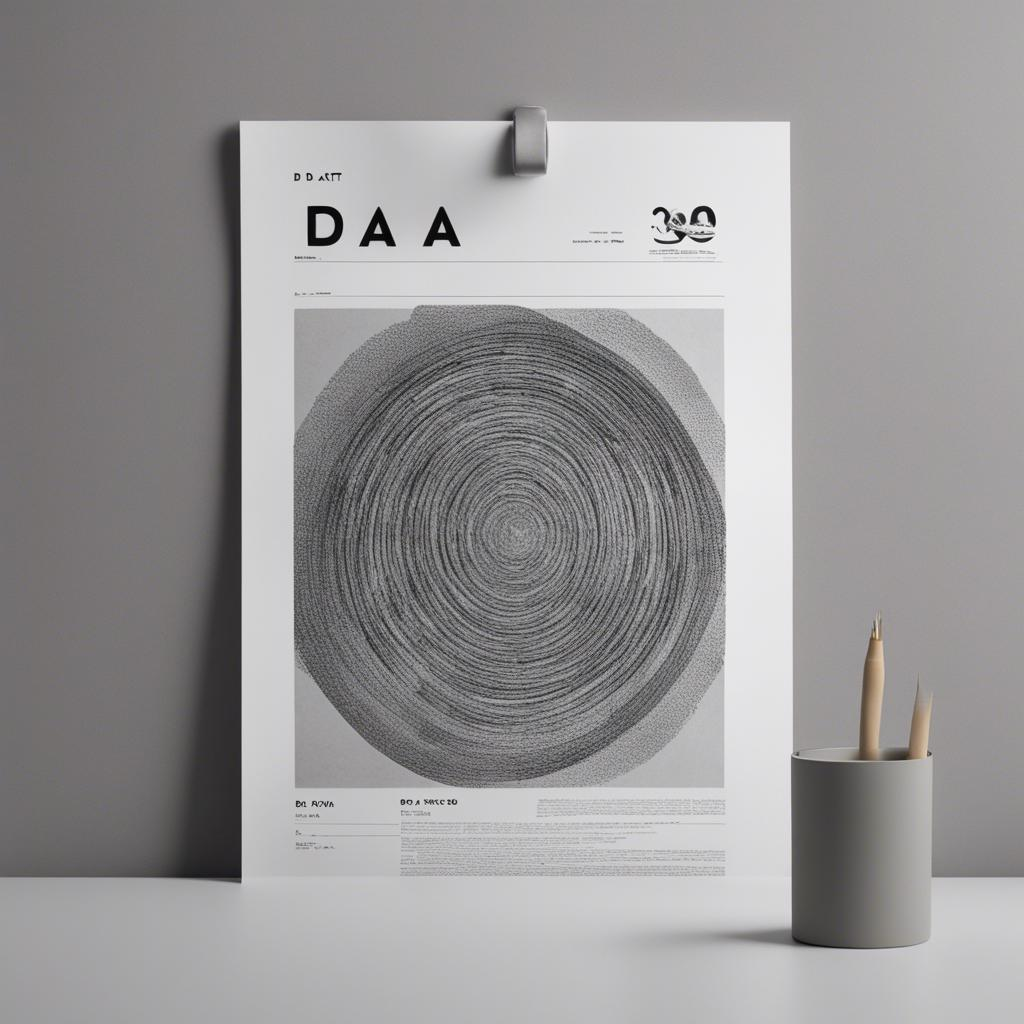

16트

- '3 0 3'과 같이 숫자에 띄어쓰기를 넣으니 이상한 원 형태의 그림을 계속 그린다 -- 이 옵션은 제거
- 5번째 시도에서 plain paper라는 문구를 넣으니 주변의 잡다한 대상이 조금 없어지는 효과를 보였으니 이 prompt 형식에 맞춰 시도
- 303은 붙여서 "종이에 숫자 303을 써줘" 라고 지시하고, 'DATA'는 각 글자를 띄어보기

In [25]:
prompt_trial16 = 'a plain paper with letters "D A T A" and a number "303" printed on it'
stable_diffusion_gen(prompt_trial16, 16)

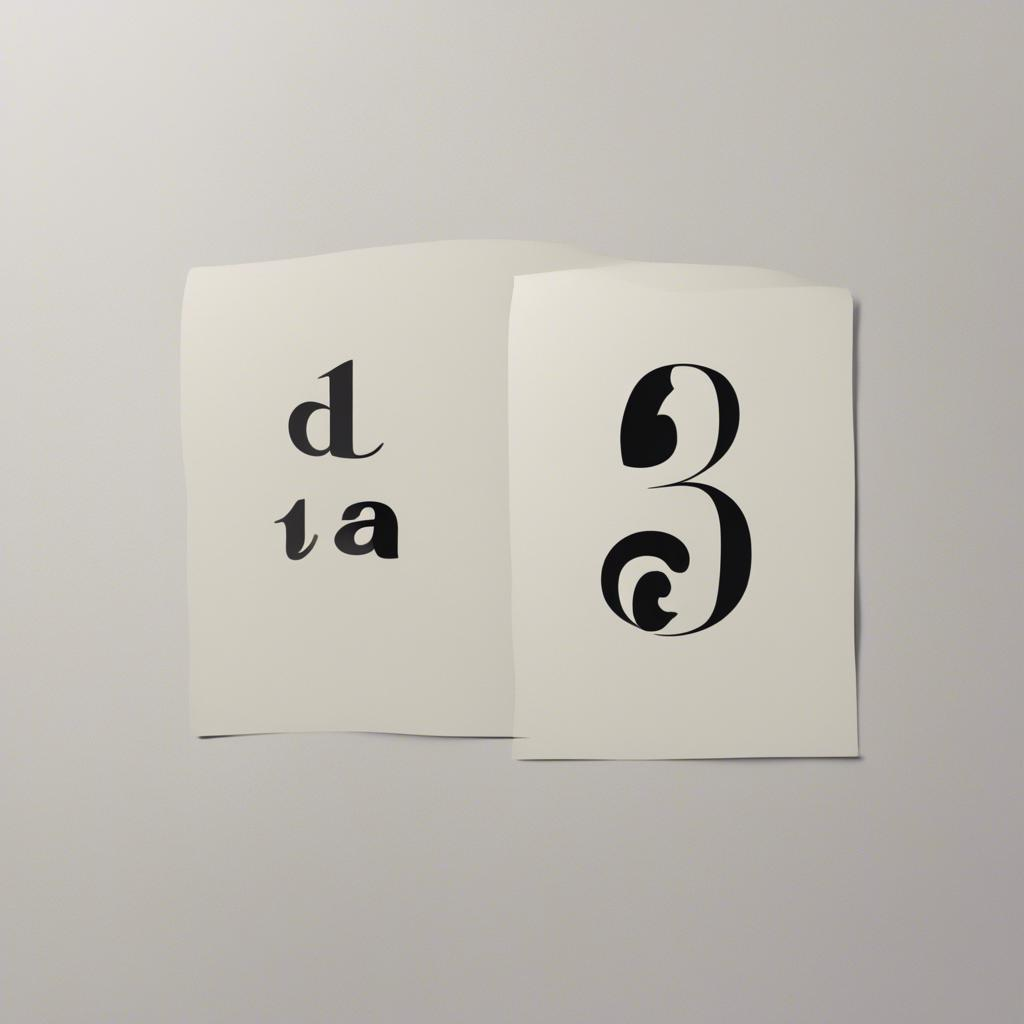

17트

- 'plain paper'라는 문구가 각종 잡다한 것을 없애는 효과를 보임
- DATA는 자주 쓰이는 영단어라서 띄어쓰기를 하지 않는 것이 더 좋은 성능을 보일 것으로 예상

In [26]:
prompt_trial17 = 'a plain paper with the word "DATA" and the number "303" printed on it'
stable_diffusion_gen(prompt_trial17, 17)

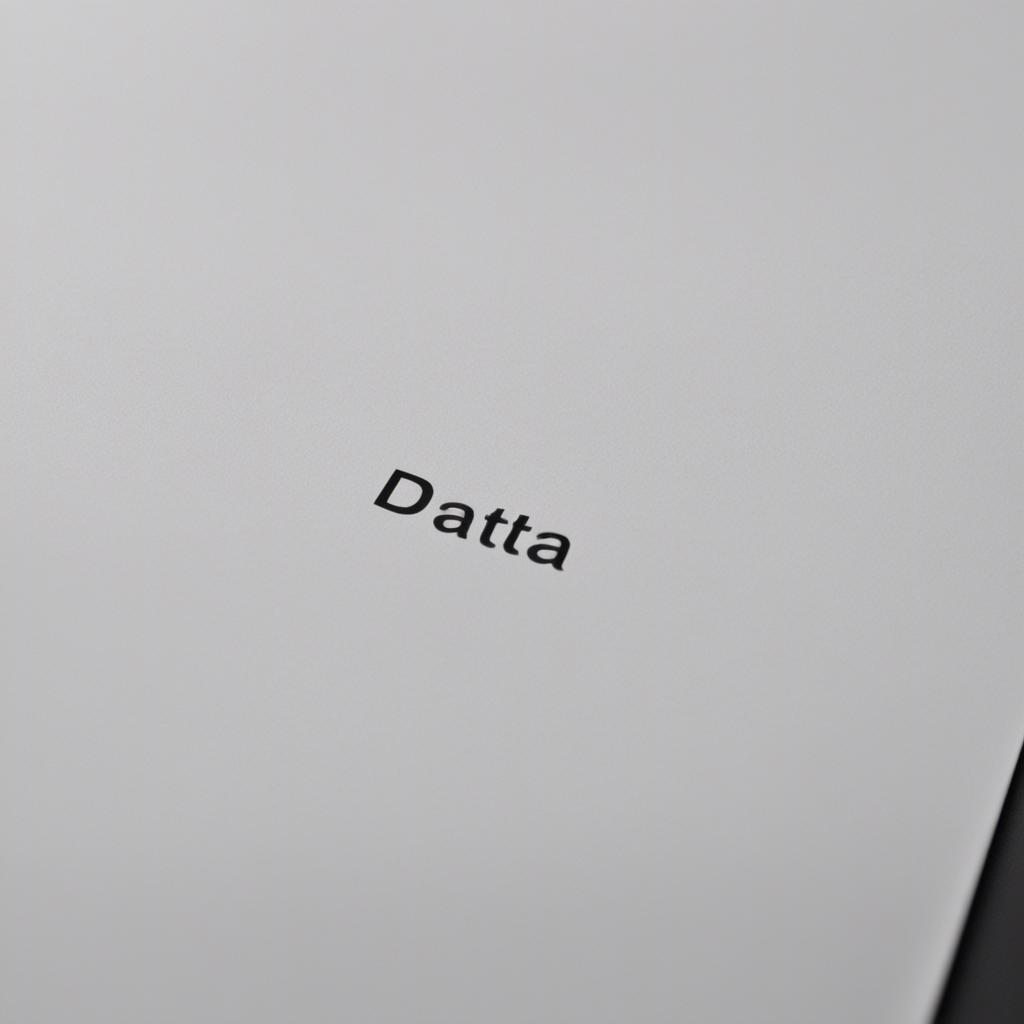

18트

- '303'을 써달라는 요청이 무시됨
- 불필요한 'the number' 문구를 제거해서 시도

In [28]:
prompt_trial18 = 'a plain paper with the words "DATA" and "303" printed on it'
stable_diffusion_gen(prompt_trial18, 18)

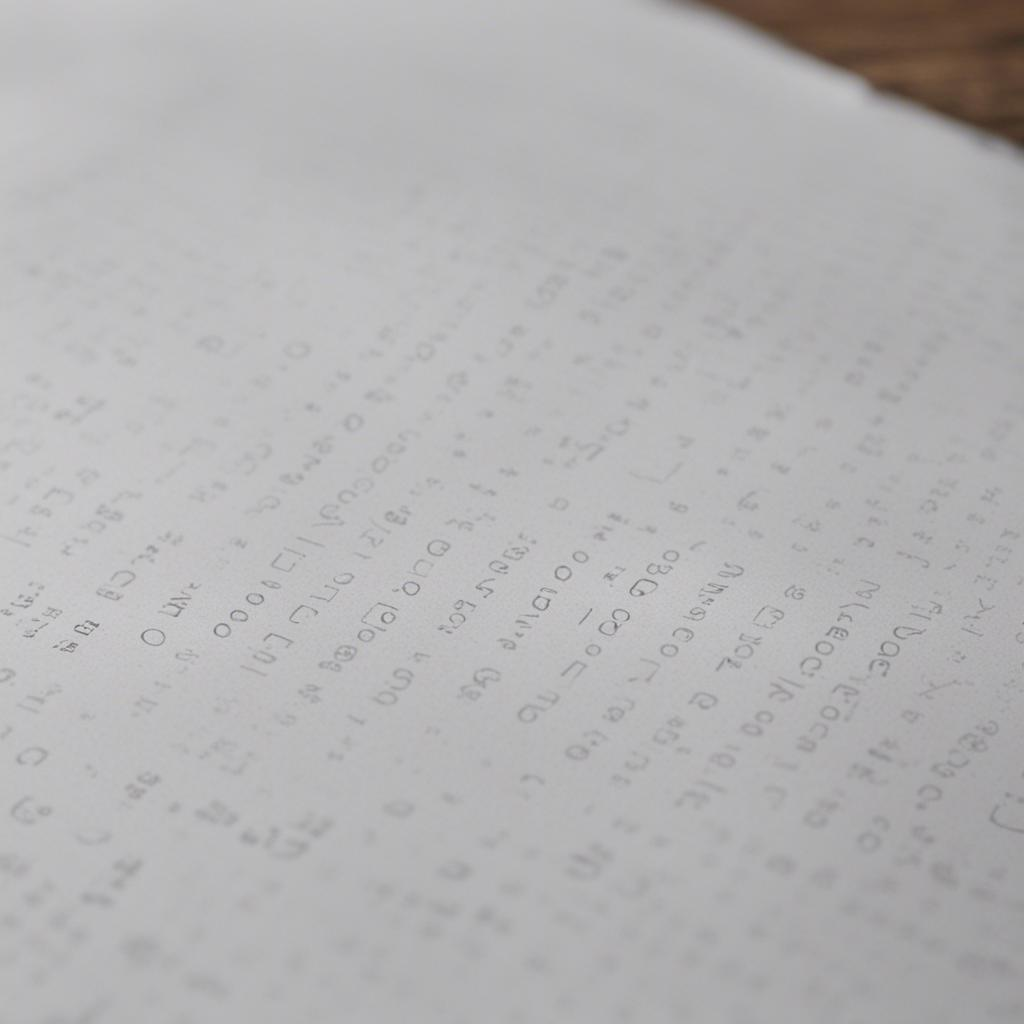

19트

- 복수형 'words'라는 말을 종이에 단어를 빼곡히 적어달라는 요청으로 해석한 듯함
- 단수형 'word'로 수정하기

In [30]:
prompt_trial19 = 'a plain paper with the word "DATA" and "303" printed on it'
stable_diffusion_gen(prompt_trial19, 19)

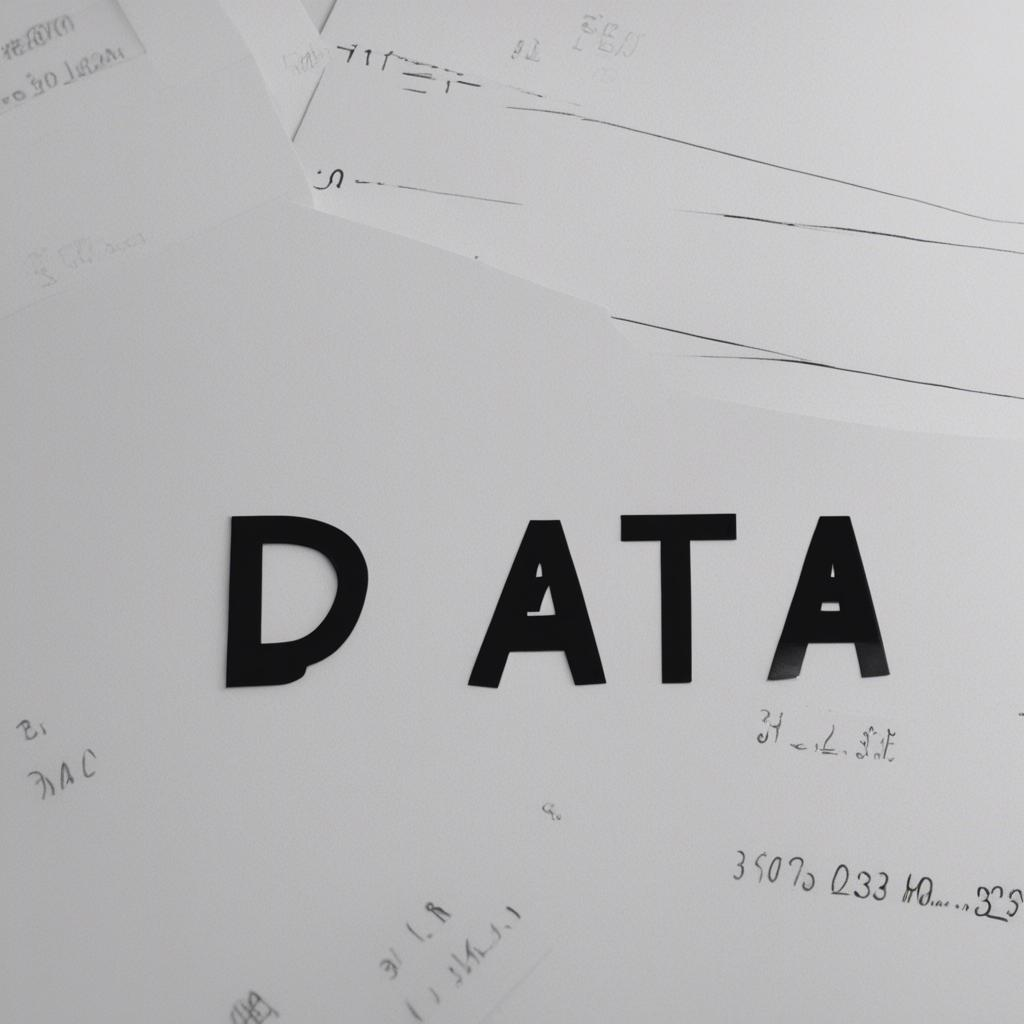

20트

- 'the word "DATA"'라는 문구에 집중돼서 and "303" 이 말은 무시되는 것으로 예상
- 5번째 시도의 prompt 형태를 다시 맞추되, 이번에는 "DATA 303"을 써달라는 요청을 시도하기

In [31]:
prompt_trial20 = 'a plain paper with the word "DATA 303" printed on it'
stable_diffusion_gen(prompt_trial20, 20)

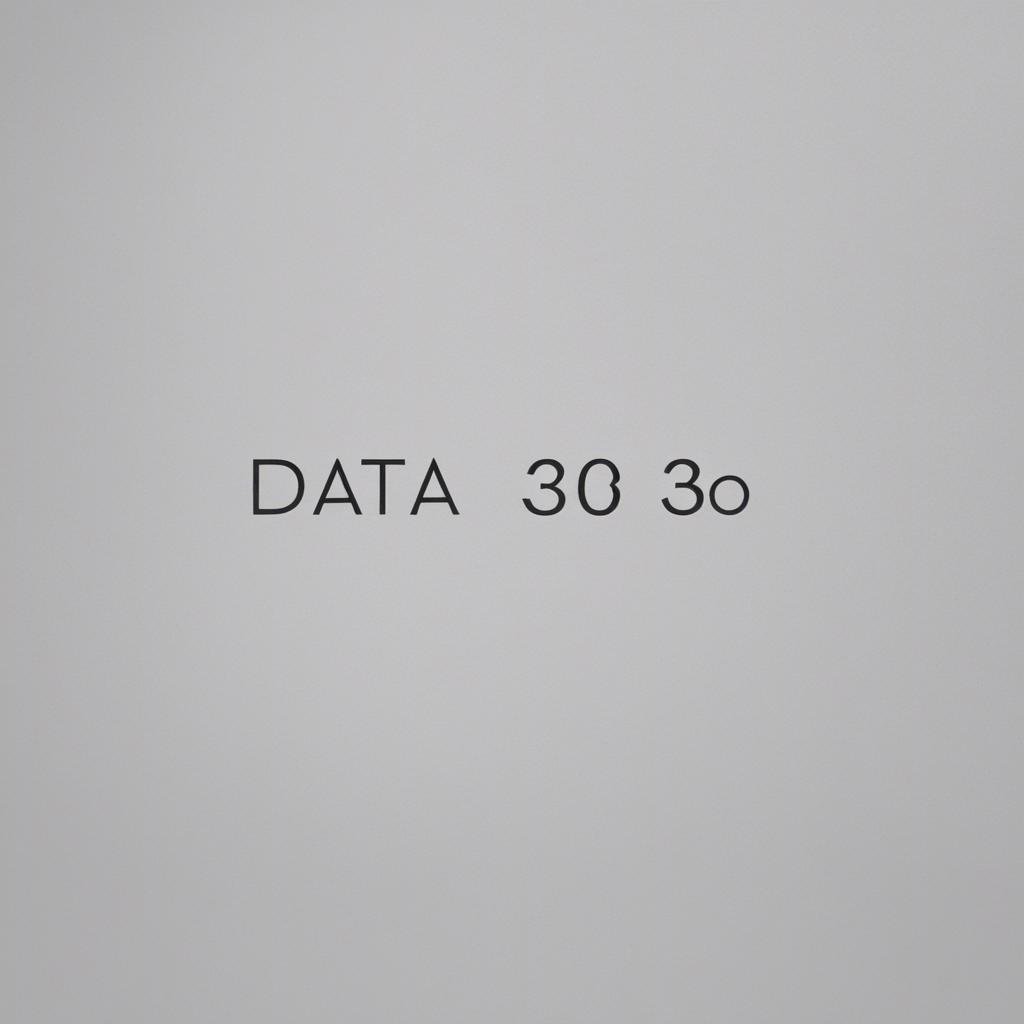

결론

- Image generating AI는 배경에 대한 설명이 일절 없으면 prompt의 전반적인 의미에 맞춰 적당히 배경을 만든다.
- 이 때문에 배경을 그리는 데에 집중하면 막상 대상을 정확하지 못하게 그리는 경우가 있다.
- 따라서 배경이 단조롭다는 의미를 가진 말을 prompt에 추가하는 편이 좋다. (여기서는 'a plain paper')
- 글씨를 그림에다 그리게 지시할 때에는 따옴표 안에 추가할 글씨를 넣어서 명시를 해주는 것이 필요하다.